# Multi linear Regression Model-1

### Import libraries

In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
from scipy import stats
import statsmodels.api as sm


import warnings
warnings.filterwarnings('ignore')

##  Import data

In [2]:
toyota_cars_data = pd.read_csv('ToyotaCorolla.csv')
toyota_cars_data

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,�TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


### Data Understanding

In [3]:
toyota_cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [4]:
toyota_cars_data.isna().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [6]:
toyota_cars_data = pd.concat([toyota_cars_data.iloc[:,2:4],toyota_cars_data.iloc[:,6:7],toyota_cars_data.iloc[:,8:9],toyota_cars_data.iloc[:,12:14],toyota_cars_data.iloc[:,15:18]],axis=1)
toyota_cars_data

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [7]:
toyota_cars_data = toyota_cars_data.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1)
toyota_cars_data

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [8]:
toyota_cars_data[toyota_cars_data.duplicated()]


,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [9]:
toyota_cars_data = toyota_cars_data.drop_duplicates().reset_index(drop=True)
toyota_cars_data

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [10]:
toyota_cars_data.shape

(1435, 9)

In [11]:
toyota_cars_data.dtypes

Price     int64
Age       int64
KM        int64
HP        int64
CC        int64
Doors     int64
Gears     int64
QT        int64
Weight    int64
dtype: object

In [12]:
toyota_cars_data.describe()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


In [13]:
toyota_cars_data.max()

Price      32500
Age           80
KM        243000
HP           192
CC         16000
Doors          5
Gears          6
QT           283
Weight      1615
dtype: int64

In [14]:
toyota_cars_data.min()

Price     4350
Age          1
KM           1
HP          69
CC        1300
Doors        2
Gears        3
QT          19
Weight    1000
dtype: int64

## Skewness and  kurtosis || Normality test (using Distplot)

In [15]:
toyota_cars_data['Price'].skew()

1.6965785809803777

In [16]:
toyota_cars_data['Price'].kurtosis()

3.7297685345419405

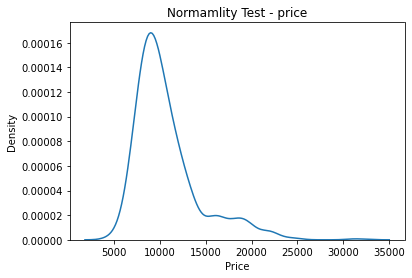

In [17]:
sns.distplot(a=toyota_cars_data['Price'],hist=False)
plt.title('Normamlity Test - price')
plt.show()

In [18]:
toyota_cars_data['Age'].skew()

-0.8255666018465969

In [19]:
toyota_cars_data['Age'].kurtosis()

-0.076573436732565

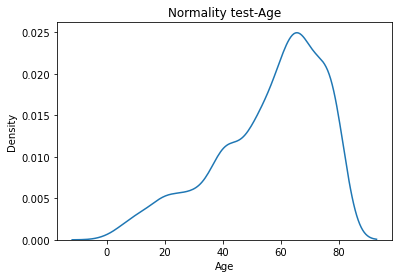

In [20]:
sns.distplot(a=toyota_cars_data['Age'],hist=False)
plt.title('Normality test-Age')
plt.show()

In [21]:
toyota_cars_data['KM'].skew()

1.0170229723462332

In [22]:
toyota_cars_data['KM'].kurtosis()

1.6885247633485445

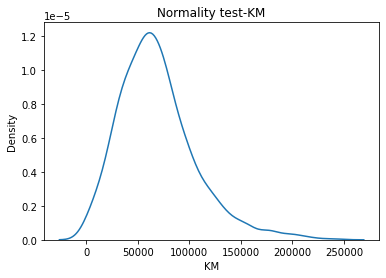

In [23]:
sns.distplot(toyota_cars_data['KM'],hist=False)
plt.title('Normality test-KM')
plt.show()

In [24]:
toyota_cars_data['HP'].skew()

0.9578333639343268

In [25]:
toyota_cars_data['HP'].kurtosis()

8.845658522324406

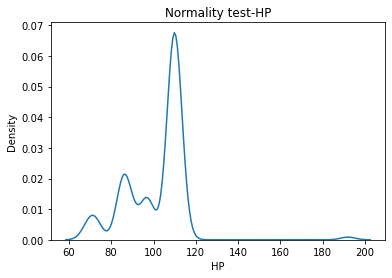

In [26]:
sns.distplot(a=toyota_cars_data['HP'],hist=False)
plt.title('Normality test-HP')
plt.show()

In [27]:
toyota_cars_data['CC'].skew()

27.45219619846663

In [28]:
toyota_cars_data['CC'].kurtosis()

931.4341727829076

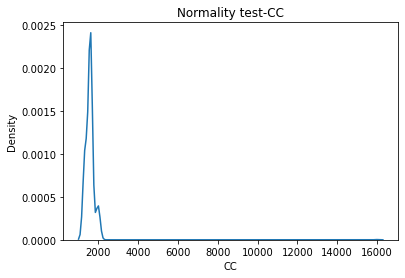

In [29]:
sns.distplot(a=toyota_cars_data['CC'],hist=False)
plt.title('Normality test-CC')
plt.show()

In [30]:
toyota_cars_data['Doors'].skew()

-0.07505603155165053

In [31]:
toyota_cars_data['Doors'].kurtosis()

-1.8748873416868563

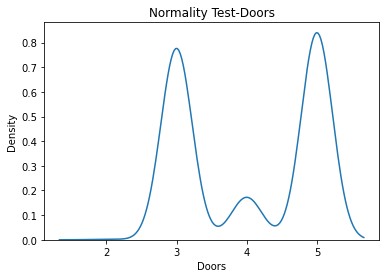

In [32]:
sns.distplot(toyota_cars_data['Doors'],hist=False)
plt.title('Normality Test-Doors')
plt.show()

In [33]:
toyota_cars_data['Gears'].skew()

2.282921227095275

In [34]:
toyota_cars_data['Gears'].kurtosis()

37.67544347486965

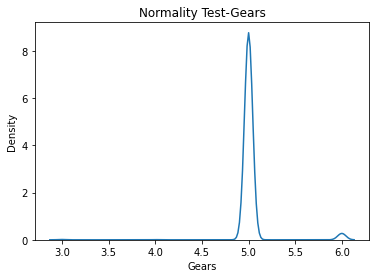

In [35]:
sns.distplot(a=toyota_cars_data['Gears'],hist=False)
plt.title('Normality Test-Gears')
plt.show()

In [36]:
toyota_cars_data['QT'].skew()

1.9953358648563562

In [37]:
toyota_cars_data['QT'].kurtosis()

4.3290357763950045

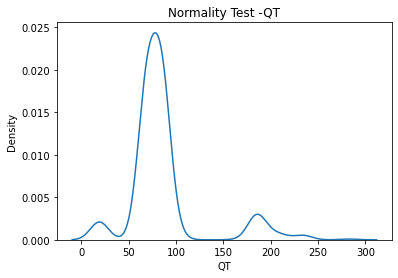

In [38]:
sns.distplot(a=toyota_cars_data['QT'],hist=False)
plt.title('Normality Test -QT')
plt.show()

In [39]:
toyota_cars_data['Weight'].skew()

3.1165183382777437

In [40]:
toyota_cars_data['Weight'].kurtosis()

19.741526687585104

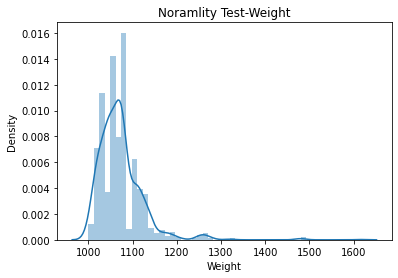

In [41]:
sns.distplot(a=toyota_cars_data['Weight'],hist=True)
plt.title('Noramlity Test-Weight')
plt.show()

## Normality test using probplot

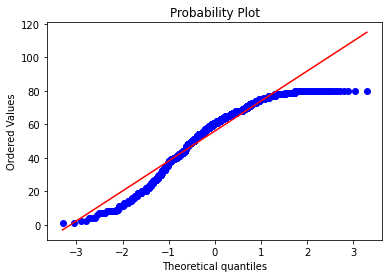

In [42]:
stats.probplot(x=toyota_cars_data['Age'],dist='norm',plot=plt)
plt.show()

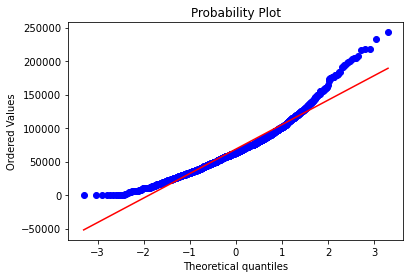

In [43]:
stats.probplot(x=toyota_cars_data['KM'],dist='norm',plot=plt)
plt.show()

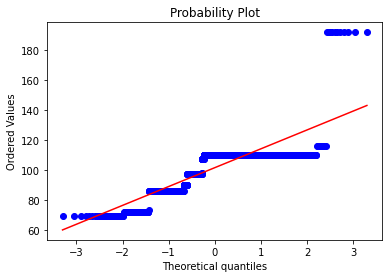

In [44]:
stats.probplot(x=toyota_cars_data['HP'],dist='norm',plot=plt)
plt.show()

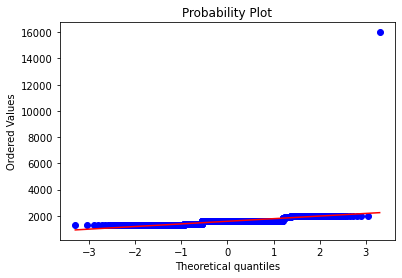

In [45]:
stats.probplot(x=toyota_cars_data['CC'],dist='norm',plot=plt)
plt.show()

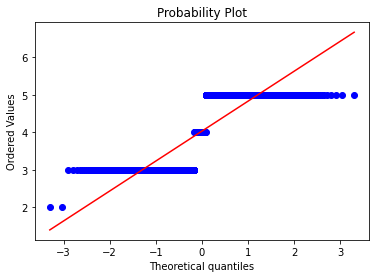

In [46]:
stats.probplot(x=toyota_cars_data['Doors'],dist='norm',plot=plt)
plt.show()

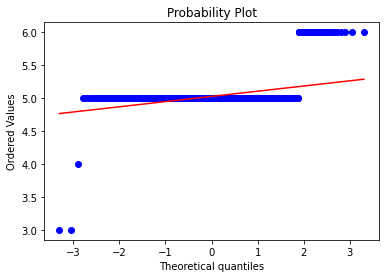

In [47]:
stats.probplot(x=toyota_cars_data['Gears'],dist='norm',plot=plt)
plt.show()

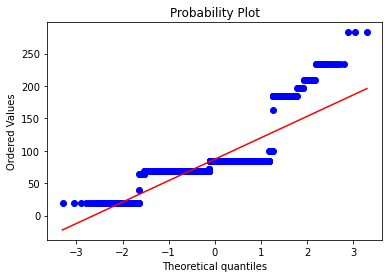

In [48]:
stats.probplot(x=toyota_cars_data['QT'],dist='norm',plot=plt)
plt.show()

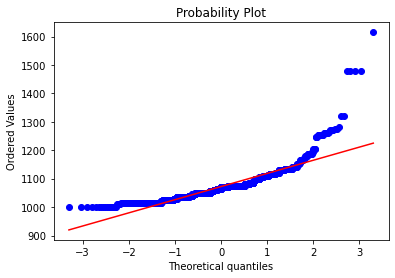

In [49]:
stats.probplot(x=toyota_cars_data['Weight'],dist='norm',plot=plt)
plt.show()

## Correlation

In [50]:
toyoto_cars_data_corr = toyota_cars_data.corr().round(2)
toyoto_cars_data_corr

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
Price,1.00,-0.88,-0.57,0.31,0.12,0.18,0.06,0.21,0.58
Age,-0.88,1.00,0.50,-0.16,-0.10,-0.15,-0.01,-0.19,-0.47
KM,-0.57,0.50,1.00,-0.33,0.10,-0.04,0.01,0.28,-0.02
HP,0.31,-0.16,-0.33,1.00,0.04,0.09,0.21,-0.30,0.09
CC,0.12,-0.10,0.10,0.04,1.00,0.08,0.01,0.31,0.34
Doors,0.18,-0.15,-0.04,0.09,0.08,1.00,-0.16,0.11,0.30
Gears,0.06,-0.01,0.01,0.21,0.01,-0.16,1.00,-0.01,0.02
QT,0.21,-0.19,0.28,-0.30,0.31,0.11,-0.01,1.00,0.62
Weight,0.58,-0.47,-0.02,0.09,0.34,0.30,0.02,0.62,1.00


## Heatmap using correlation data


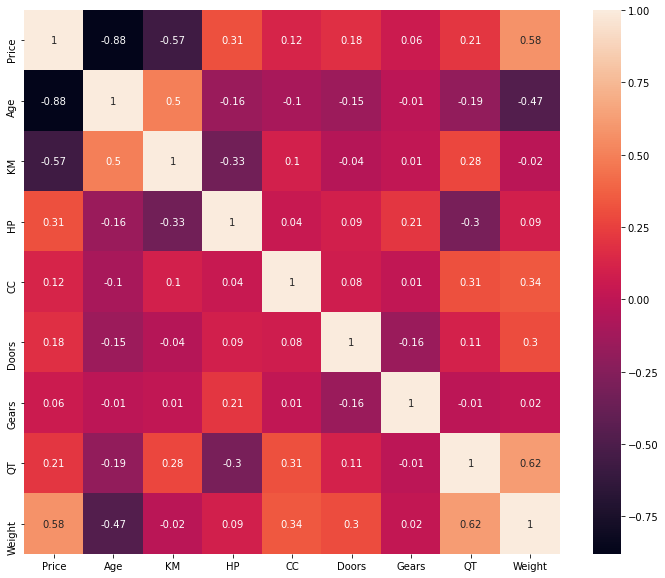

In [51]:
plt.figure(figsize=(12,10))
sns.heatmap(toyoto_cars_data_corr,annot=True)
plt.show()

### Scatterplot between variables alongs with hiistogram

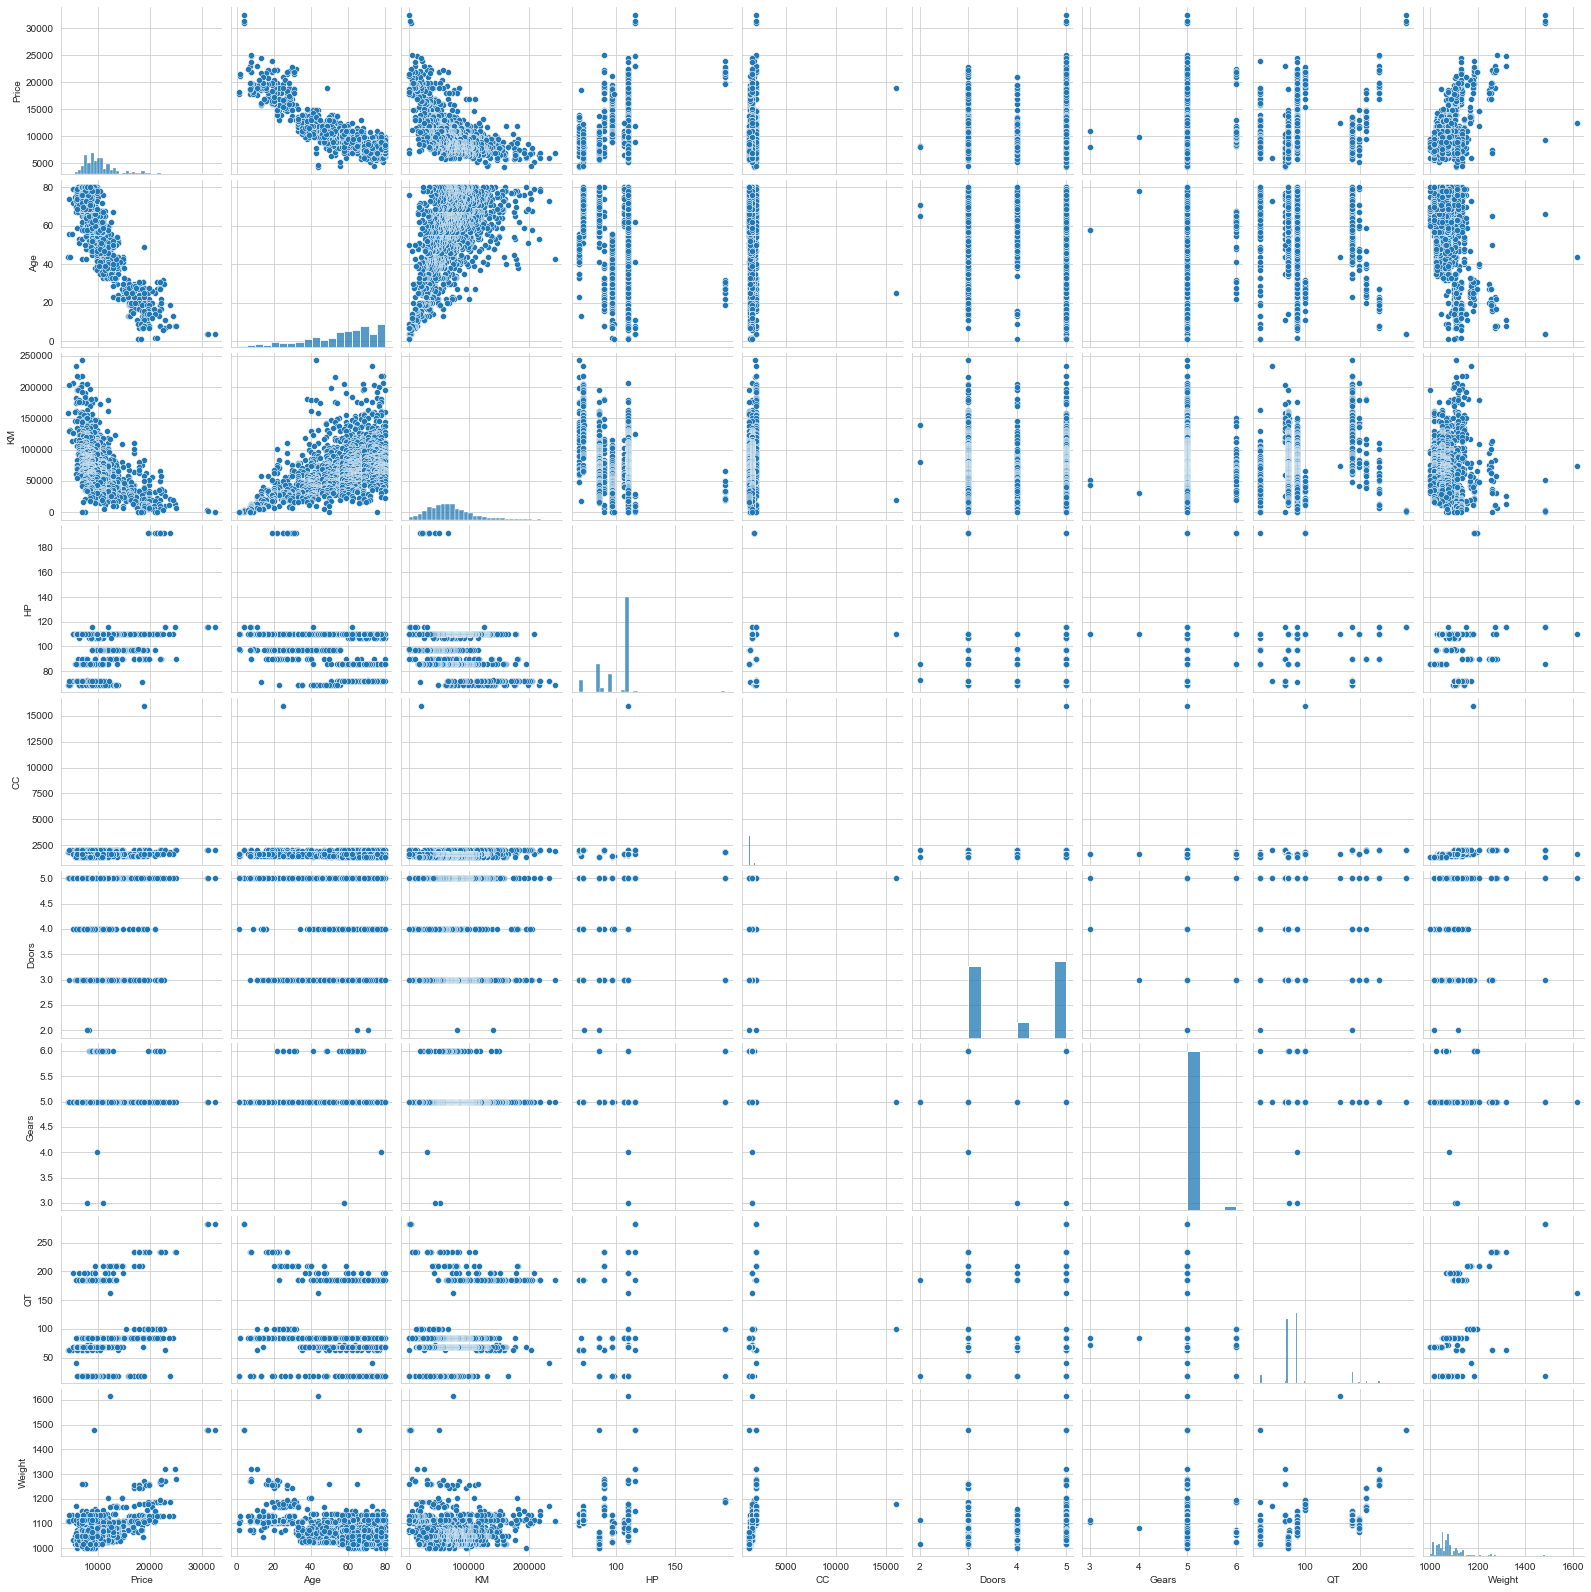

In [53]:
# format the plot background  and scatter plots for all variables
sns.set_style('whitegrid')
sns.pairplot(toyota_cars_data)
plt.show()

## Let's create a Referance data to understand how x features should behave with y.

In [55]:
toyota_cars_data.shape 

(1435, 9)

In [58]:
X = np.random.randn(81)
y = 10*X + np.random.randn(81)*2

In [59]:
X_df = pd.DataFrame(data=[X,y]).T 
X_df.columns = ['X','y']
X_df

,X,y
0,-1.452762,-12.853782
1,0.456404,2.736021
2,-0.799876,-8.310202
3,-1.058547,-11.434159
4,-0.116093,-3.400524
...,...,...
76,-0.183081,-0.660062
77,0.455936,4.439094
78,-1.381817,-17.445767
79,-3.161067,-29.642375


### 1. Linearity Test - passed


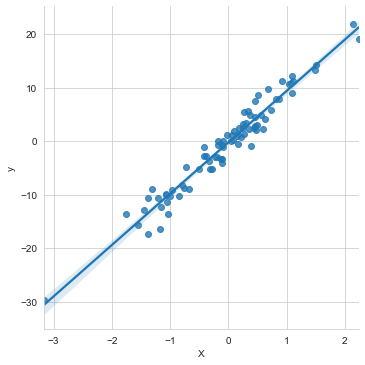

In [60]:
sns.lmplot(x='X',y='y',data=X_df)

###  2. Noramality Test - Passed

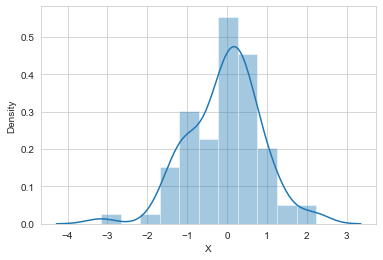

In [61]:
sns.distplot(a = X_df['X'],hist=True)
plt.show()

In [62]:
X_df.skew()

X   -0.321166
y   -0.254986
dtype: float64

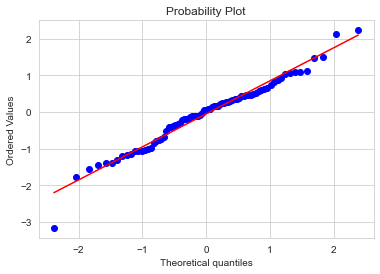

In [63]:
stats.probplot(x = X_df['X'],dist='norm',plot=plt)
plt.show()

#  Model Building

In [64]:
x = X_df[['X']]
y = X_df[['y']]


## Model Training using sklearn Library

In [65]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression() #object creation/ model initialization
linear_model.fit(x,y)

LinearRegression()

In [66]:
linear_model.intercept_

array([-0.22143174])

In [67]:
linear_model.coef_

array([[9.60120957]])

##  Model Testing

In [68]:
y_pred = linear_model.predict(x)

## Model Evalution

In [69]:
y

,y
0,-12.853782
1,2.736021
2,-8.310202
3,-11.434159
4,-3.400524
...,...
76,-0.660062
77,4.439094
78,-17.445767
79,-29.642375


In [70]:
y_pred

array([[-14.1697061 ],
       [  4.16059409],
       [ -7.90121195],
       [-10.38476795],
       [ -1.33606151],
       [  1.85109265],
       [  0.39388875],
       [ -3.50799207],
       [  3.08169947],
       [ 14.1467857 ],
       [  5.54617013],
       [  2.12882908],
       [  2.38637919],
       [  2.11584604],
       [  1.30850371],
       [ 10.17501801],
       [  0.70453748],
       [ -5.05007535],
       [ -7.63132551],
       [ 10.45658225],
       [  6.20871368],
       [-10.11067076],
       [  9.78764677],
       [ -0.45116098],
       [  3.50654466],
       [  1.31542006],
       [ -8.41348027],
       [  1.50111963],
       [ -1.20936043],
       [  5.857672  ],
       [  4.11467429],
       [  4.67553059],
       [ -1.24122934],
       [-11.27693834],
       [ -3.00151608],
       [-10.47482483],
       [  4.51258527],
       [-10.43769125],
       [-11.5228283 ],
       [  6.84639267],
       [  3.9382914 ],
       [ -9.53762149],
       [ -1.5351434 ],
       [ -9

In [71]:
error = y-y_pred
error


,y
0,1.315924
1,-1.424573
2,-0.408990
3,-1.049391
4,-2.064462
...,...
76,1.319172
77,0.282990
78,-3.957221
79,0.929126


## 5.Homoscedasticity Check

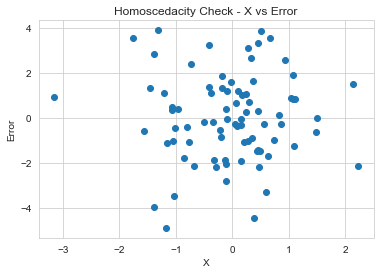

In [72]:
plt.scatter(x= X_df['X'],y=error)
plt.title('Homoscedacity Check - X vs Error')
plt.xlabel('X')
plt.ylabel('Error')
plt.show()

###  6. Zero Residual Mean Test 

It is a plot between **Actual Output Vs Predicted Plot.**

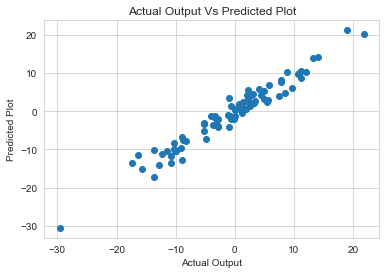

In [73]:
plt.scatter(x= y,y=y_pred)
plt.title('Actual Output Vs Predicted Plot')
plt.xlabel('Actual Output')
plt.ylabel('Predicted Plot')
plt.show()

###  Zero residual Mean Test is Passed.

## ==========================================================

# COME BACK to CARS DATA

In [74]:
toyota_cars_data

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


### Model Building

In [75]:
X = toyota_cars_data.drop(['Price'],axis= 1)
y = toyota_cars_data[['Price']]

In [76]:
x.columns

Index(['X'], dtype='object')

In [77]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_scaled = std_scaler.fit_transform(X)
X_scaled = pd.DataFrame(data=X_scaled,columns= X.columns)
X_scaled

,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,-1.777268,-0.575958,-0.767351,0.998113,-1.084443,-0.140475,3.003513,1.774964
1,-1.777268,0.116474,-0.767351,0.998113,-1.084443,-0.140475,3.003513,1.774964
2,-1.723380,-0.716707,-0.767351,0.998113,-1.084443,-0.140475,3.003513,1.774964
3,-1.615603,-0.548902,-0.767351,0.998113,-1.084443,-0.140475,3.003513,1.774964
4,-1.400049,-0.802384,-0.767351,0.998113,-1.084443,-0.140475,3.003513,1.870688
...,...,...,...,...,...,...,...,...
1430,0.701602,-1.281492,-1.034441,-0.651898,-1.084443,-0.140475,-0.440104,-0.905299
1431,0.863267,-1.322689,-1.034441,-0.651898,-1.084443,-0.140475,-0.440104,-1.096747
1432,0.809379,-1.375627,-1.034441,-0.651898,-1.084443,-0.140475,-0.440104,-1.096747
1433,0.755490,-1.378295,-1.034441,-0.651898,-1.084443,-0.140475,-0.440104,-1.096747


### Before Scaling

In [78]:
X.mean()

Age          55.980488
KM        68571.782578
HP          101.491986
CC         1576.560976
Doors         4.032753
Gears         5.026481
QT           87.020209
Weight     1072.287108
dtype: float64

In [79]:
X.std()

Age          18.563312
KM        37491.094553
HP           14.981408
CC          424.387533
Doors         0.952667
Gears         0.188575
QT           40.959588
Weight       52.251882
dtype: float64

### After Scaling

In [80]:
X_scaled.mean()

Age      -1.668042e-16
KM        2.503611e-16
HP        1.166856e-15
CC       -1.581923e-15
Doors    -1.241902e-15
Gears    -2.065363e-15
QT       -1.220085e-15
Weight    1.496287e-16
dtype: float64

In [81]:
X_scaled.std()

Age       1.000349
KM        1.000349
HP        1.000349
CC        1.000349
Doors     1.000349
Gears     1.000349
QT        1.000349
Weight    1.000349
dtype: float64

## Model Training

In [82]:
linear_model_2 = LinearRegression()
linear_model_2.fit(X_scaled,y)

LinearRegression()

In [85]:
linear_model_2.coef_

array([[-2.25862554e+03, -7.77200045e+02,  4.73017054e+02,
        -5.02968400e+01, -8.76327907e-01,  1.12674914e+02,
         1.57999990e+02,  8.80423097e+02]])

In [86]:
linear_model_2.intercept_

array([10720.91567944])

## Model Testing

In [87]:
y_pred = linear_model_2.predict(X_scaled)

## Model Evalution

In [88]:
toyota_cars_data_error = y - y_pred
toyota_cars_data_error

,Price
0,-3291.958871
1,-2503.800414
2,-2829.635210
3,-1455.789389
4,-2450.217277
...,...
1430,-1294.255037
1431,2552.422658
1432,44.565598
1433,-1329.222041


## Homoscedascity Check

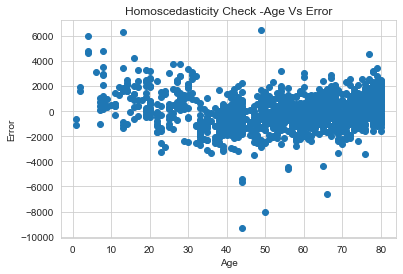

In [89]:
plt.scatter(x = toyota_cars_data['Age'],y = toyota_cars_data_error)
plt.title('Homoscedasticity Check -Age Vs Error')
plt.xlabel('Age')
plt.ylabel('Error')
plt.show()

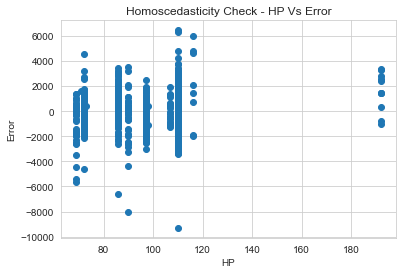

In [90]:
plt.scatter(x = toyota_cars_data['HP'],y = toyota_cars_data_error)
plt.title('Homoscedasticity Check - HP Vs Error')
plt.xlabel('HP')
plt.ylabel('Error')
plt.show()

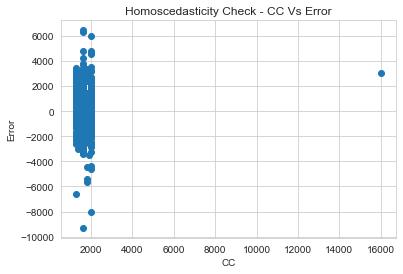

In [91]:
plt.scatter(x = toyota_cars_data['CC'],y = toyota_cars_data_error)
plt.title('Homoscedasticity Check - CC Vs Error')
plt.xlabel('CC')
plt.ylabel('Error')
plt.show()

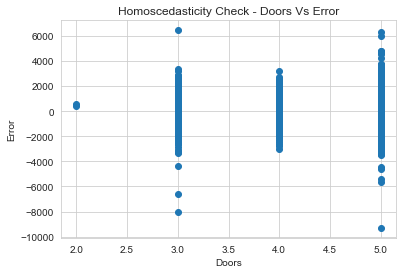

In [92]:
plt.scatter(x = toyota_cars_data['Doors'],y = toyota_cars_data_error)
plt.title('Homoscedasticity Check - Doors Vs Error')
plt.xlabel('Doors')
plt.ylabel('Error')
plt.show()

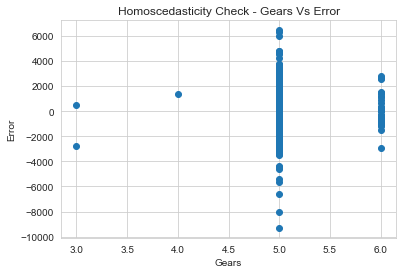

In [93]:
plt.scatter(x = toyota_cars_data['Gears'],y = toyota_cars_data_error)
plt.title('Homoscedasticity Check - Gears Vs Error')
plt.xlabel('Gears')
plt.ylabel('Error')
plt.show()

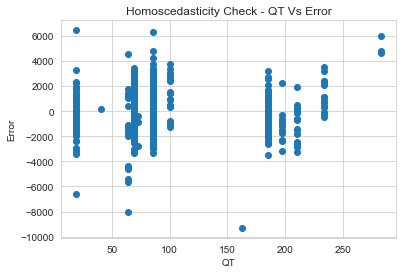

In [94]:
plt.scatter(x = toyota_cars_data['QT'],y = toyota_cars_data_error)
plt.title('Homoscedasticity Check - QT Vs Error')
plt.xlabel('QT')
plt.ylabel('Error')
plt.show()

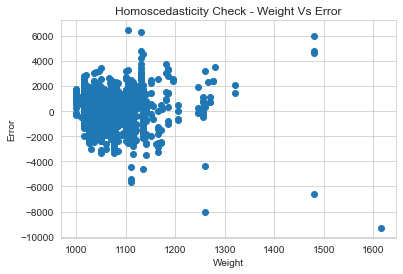

In [95]:
plt.scatter(x = toyota_cars_data['Weight'],y = toyota_cars_data_error)
plt.title('Homoscedasticity Check - Weight Vs Error')
plt.xlabel('Weight')
plt.ylabel('Error')
plt.show()

#### Homoscedascity Test Failed

## 6. Zero Residual Mean Test
It is a plot between Actual Output Vs Predicted Plot.

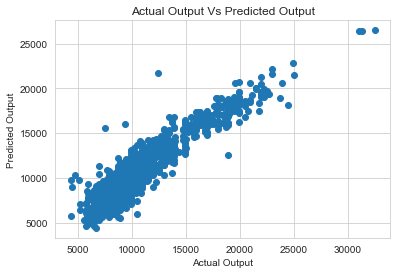

In [96]:
plt.scatter(x = y,y = y_pred)
plt.title('Actual Output Vs Predicted Output')
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')
plt.show()

#### Zero Residual Mean Test also Failed

# ============================================================

## Model Building || using statsmodel

In [98]:
model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=toyota_cars_data).fit()

## Model Testing


In [99]:
model.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
CC             -0.118558
Doors          -0.920189
Gears         597.715894
QT              3.858805
Weight         16.855470
dtype: float64

In [100]:
#Finding tvalues and pvalues of model
model.pvalues,'\n', model.tvalues

(Intercept     1.113392e-04
 Age          1.879217e-288
 KM            1.994713e-56
 HP            5.211155e-28
 CC            1.882393e-01
 Doors         9.816443e-01
 Gears         2.452430e-03
 QT            3.290363e-03
 Weight        1.031118e-51
 dtype: float64,
 '\n',
 Intercept    -3.875273
 Age         -46.551876
 KM          -16.552424
 HP           11.209719
 CC           -1.316436
 Doors        -0.023012
 Gears         3.034563
 QT            2.944198
 Weight       15.760663
 dtype: float64)

In [101]:
#R squarred values
model.rsquared,model.rsquared_adj

(0.8625200256947, 0.8617487495415146)

## Simple linear regression model

In [102]:
model_1 = smf.ols('Price~CC',data=toyota_cars_data).fit()
print(model_1.tvalues,'\n',model_1.pvalues)
model_1.summary()

Intercept    24.879592
CC            4.745039
dtype: float64 
 Intercept    7.236022e-114
CC            2.292856e-06
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     22.52
Date:                Sat, 19 Feb 2022   Prob (F-statistic):           2.29e-06
Time:                        14:15:44   Log-Likelihood:                -13779.
No. Observations:                1435   AIC:                         2.756e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9053.5368    363.894     24.880      0.000    8339.715    9767.359
CC             1.0576      0.223      4.745      0.000       0.620       1.495
==============================================================================
Omnibus:                      463.846   Durbin-Watson:                   0.269
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1386.822
Skew:                           1.645   Prob(JB):                    7.17e-302
Kurtosis:                       6.518   Cond. No.                     6.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [103]:
model_2 =smf.ols('Price~Doors',data=toyota_cars_data).fit()
print(model_2.tvalues,'\n',model_2.pvalues)
model_2.summary()

Intercept    19.421546
Doors         7.070520
dtype: float64 
 Intercept    8.976407e-75
Doors        2.404166e-12
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     49.99
Date:                Sat, 19 Feb 2022   Prob (F-statistic):           2.40e-12
Time:                        14:15:58   Log-Likelihood:                -13765.
No. Observations:                1435   AIC:                         2.753e+04
Df Residuals:                    1433   BIC:                         2.755e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7916.1452    407.596     19.422      0.000    7116.596    8715.694
Doors        695.4978     98.366      7.071      0.000     502.541     888.454
==============================================================================
Omnibus:                      465.543   Durbin-Watson:                   0.289
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1403.980
Skew:                           1.647   Prob(JB):                    1.35e-305
Kurtosis:                       6.554   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [137]:
model_3 = smf.ols('Price~CC+Doors',data=cars_data).fit()
print(model_3.tvalues,'\n',model_3.pvalues)
model_3.summary()

Intercept    12.786341
CC            4.268006
Doors         6.752236
dtype: float64 
 Intercept    1.580945e-35
CC           2.101878e-05
Doors        2.109558e-11
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     34.40
Date:                Thu, 20 Jan 2022   Prob (F-statistic):           2.55e-15
Time:                        04:23:29   Log-Likelihood:                -13756.
No. Observations:                1435   AIC:                         2.752e+04
Df Residuals:                    1432   BIC:                         2.753e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6568.3395    513.700     12.786      0.000    5560.655    7576.024
CC             0.9398      0.220      4.268      0.000       0.508       1.372
Doors        662.3187     98.089      6.752      0.000     469.906     854.732
==============================================================================
Omnibus:                      448.494   Durbin-Watson:                   0.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1297.612
Skew:                           1.602   Prob(JB):                    1.69e-282
Kurtosis:                       6.382   Cond. No.                     9.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Model validation Techniques

###  two techniques - 1. collinearity check

In [104]:
# 1) Collinearity Problem Check
# Calculate VIF = 1/(1-Rsquare) for all independent variables

rsq_age=smf.ols('Age~KM+HP+CC+Doors+Gears+QT+Weight',data=toyota_cars_data).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_KM=smf.ols('KM~Age+HP+CC+Doors+Gears+QT+Weight',data=toyota_cars_data).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_HP=smf.ols('HP~Age+KM+CC+Doors+Gears+QT+Weight',data=toyota_cars_data).fit().rsquared
vif_HP=1/(1-rsq_HP)

rsq_CC=smf.ols('CC~Age+KM+HP+Doors+Gears+QT+Weight',data=toyota_cars_data).fit().rsquared
vif_CC=1/(1-rsq_CC)

rsq_DR=smf.ols('Doors~Age+KM+HP+CC+Gears+QT+Weight',data=toyota_cars_data).fit().rsquared
vif_DR=1/(1-rsq_DR)

rsq_GR=smf.ols('Gears~Age+KM+HP+CC+Doors+QT+Weight',data=toyota_cars_data).fit().rsquared
vif_GR=1/(1-rsq_GR)

rsq_QT=smf.ols('QT~Age+KM+HP+CC+Doors+Gears+Weight',data=toyota_cars_data).fit().rsquared
vif_QT=1/(1-rsq_QT)

rsq_WT=smf.ols('Weight~Age+KM+HP+CC+Doors+Gears+QT',data=toyota_cars_data).fit().rsquared
vif_WT=1/(1-rsq_WT)

# Putting the values in Dataframe format
d1={'Variables':['Age','KM','HP','CC','Doors','Gears','QT','Weight'],
    'Vif':[vif_age,vif_KM,vif_HP,vif_CC,vif_DR,vif_GR,vif_QT,vif_WT]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,CC,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,QT,2.295375
7,Weight,2.487180


In [139]:
# None variable has VIF>20, No Collinearity, so consider all varaibles in Regression

### 2. Residual Test

 #### Test for  normality of residuals(Q-Q plot)

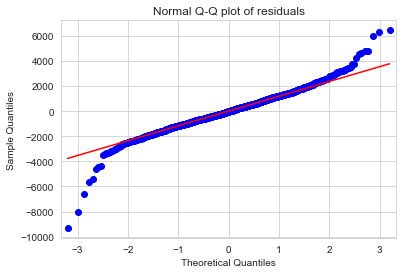

In [105]:
qqplot =sm.qqplot(model.resid,line='q')
plt.title('Normal Q-Q plot of residuals') # line = 45 to draw the diagnoal line
plt.show()

In [106]:
list(np.where(model.resid>6000)) #outlier detection from above QQ plot  of residuals.

[array([109, 146, 522], dtype=int64)]

In [107]:
list(np.where(model.resid<-6000))

[array([220, 600, 959], dtype=int64)]

##  Test for homoscedasticity or Heteroscedasticity

In [108]:
def standard_values ( vals ):
    return(vals - vals.mean())/vals.std()

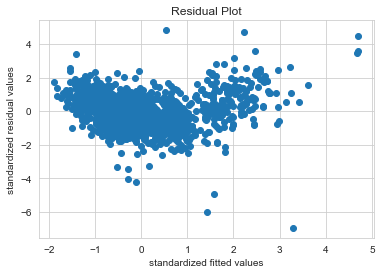

In [109]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show()

### Residual Vs Regressors

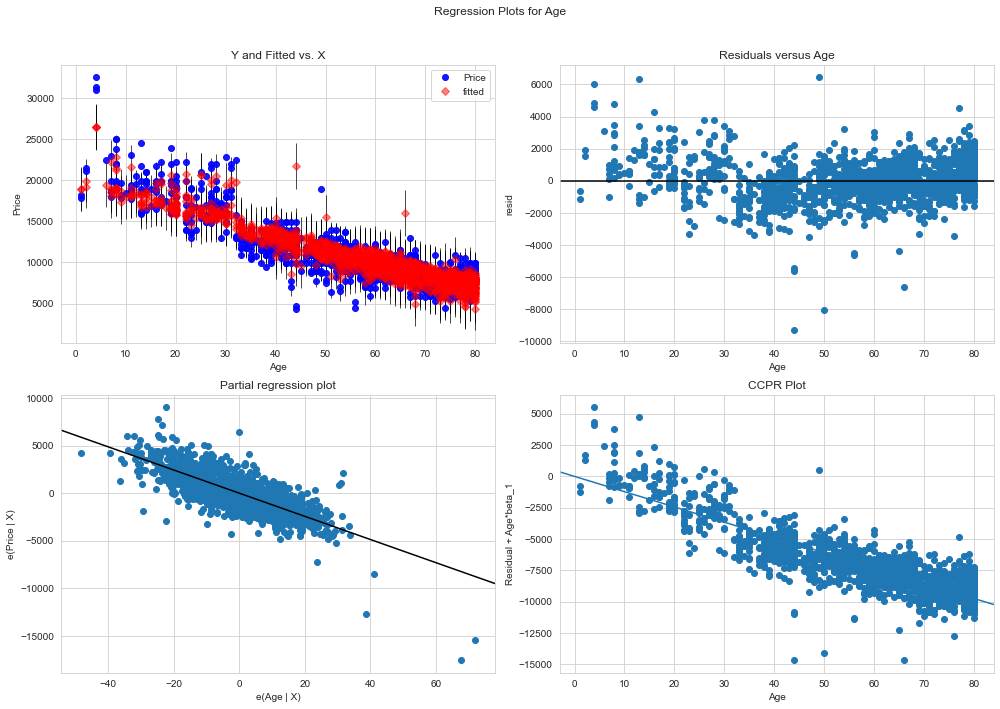

In [110]:
fig = plt.figure(figsize=(14,10))
fig = sm.graphics.plot_regress_exog(model,"Age",fig=fig)
plt.show()

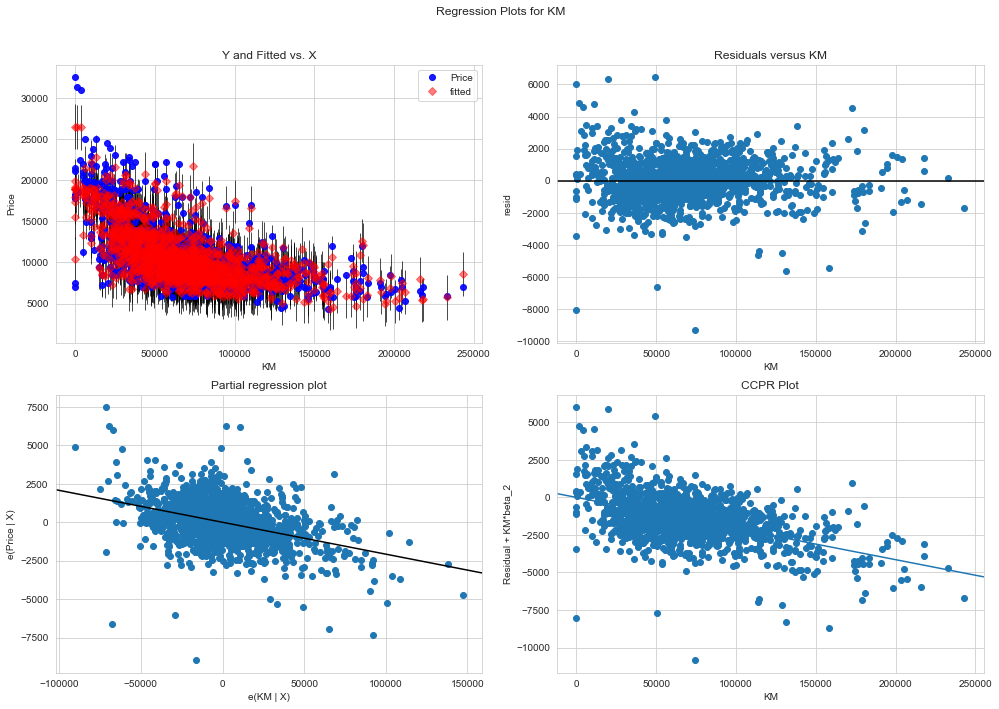

In [111]:
fig = plt.figure(figsize=(14,10))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

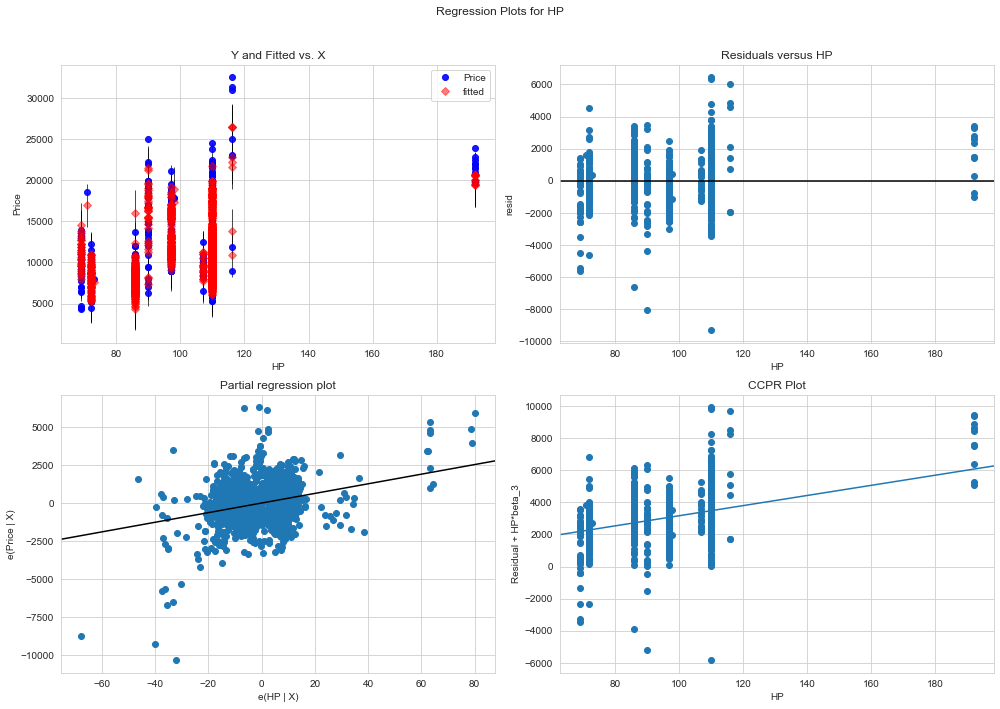

In [112]:
fig = plt.figure(figsize=(14,10))
fig = sm.graphics.plot_regress_exog(model, "HP",fig=fig)
plt.show()

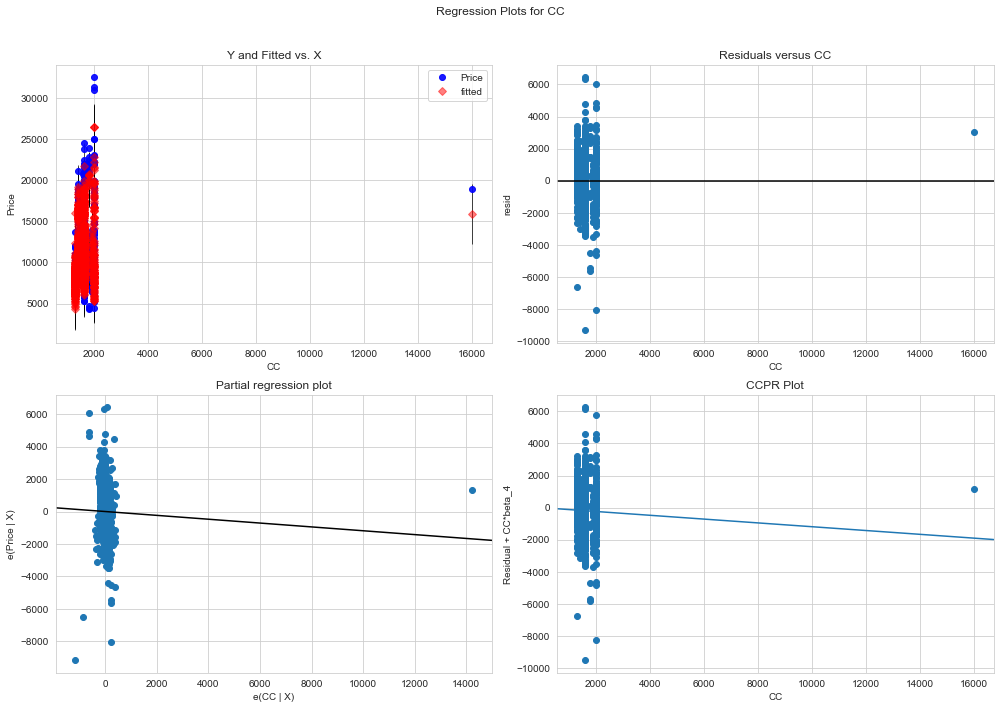

In [113]:
fig = plt.figure(figsize=(14,10))
fig = sm.graphics.plot_regress_exog(model, "CC",fig=fig)
plt.show()

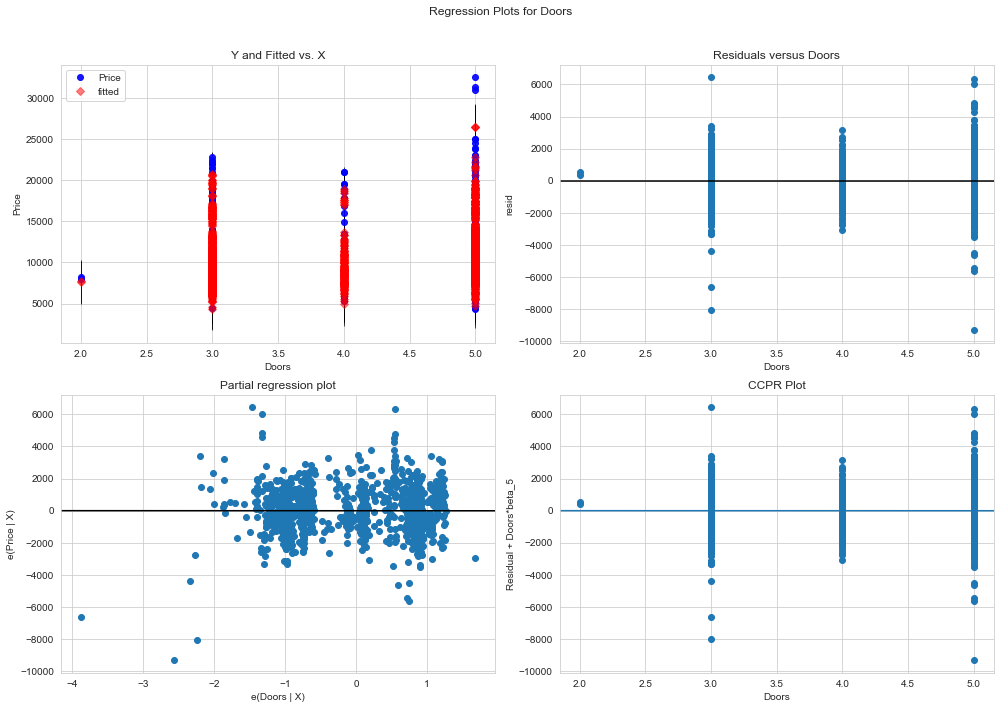

In [114]:
fig = plt.figure(figsize=(14,10))
fig = sm.graphics.plot_regress_exog(model, "Doors",fig=fig)
plt.show()

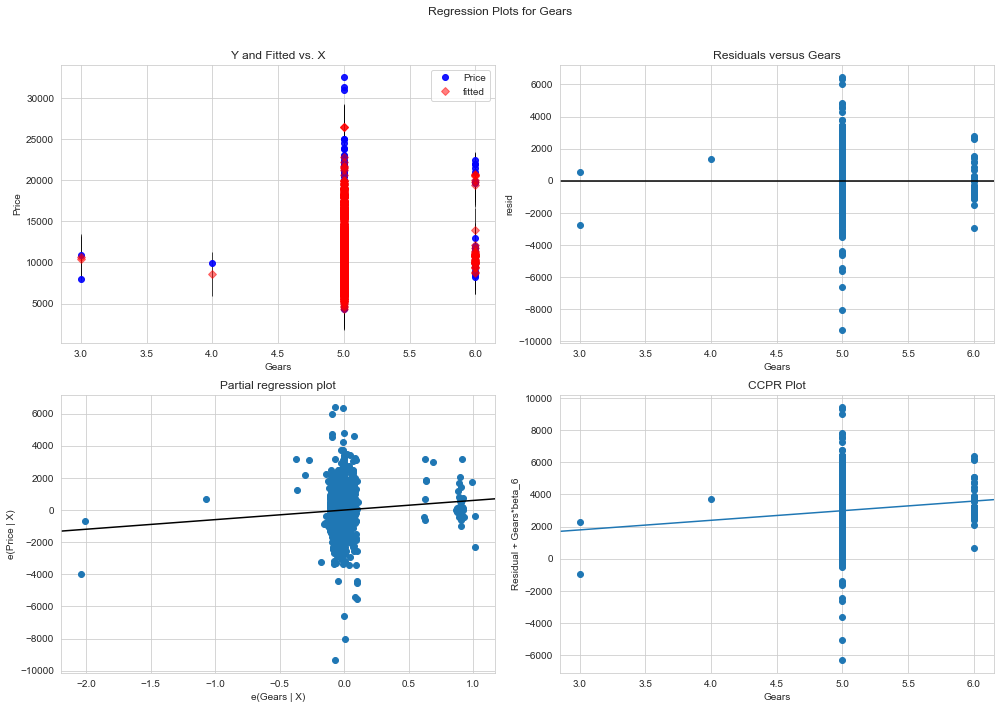

In [115]:
fig = plt.figure(figsize=(14,10))
fig = sm.graphics.plot_regress_exog(model, "Gears",fig=fig)
plt.show()

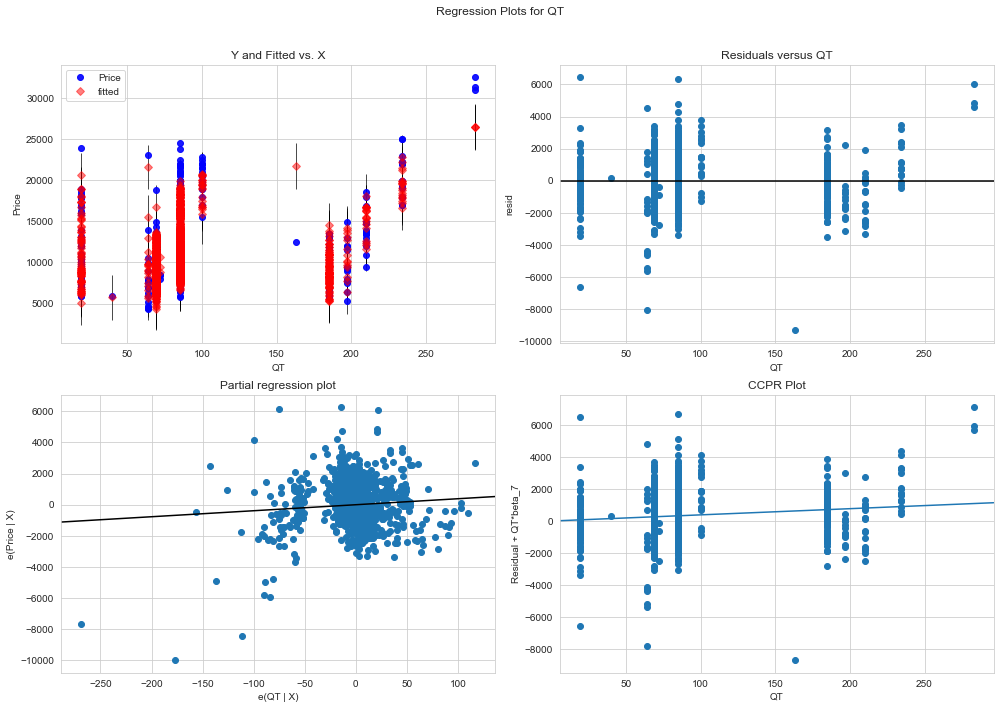

In [116]:
fig = plt.figure(figsize=(14,10))
fig = sm.graphics.plot_regress_exog(model, "QT",fig=fig)
plt.show()

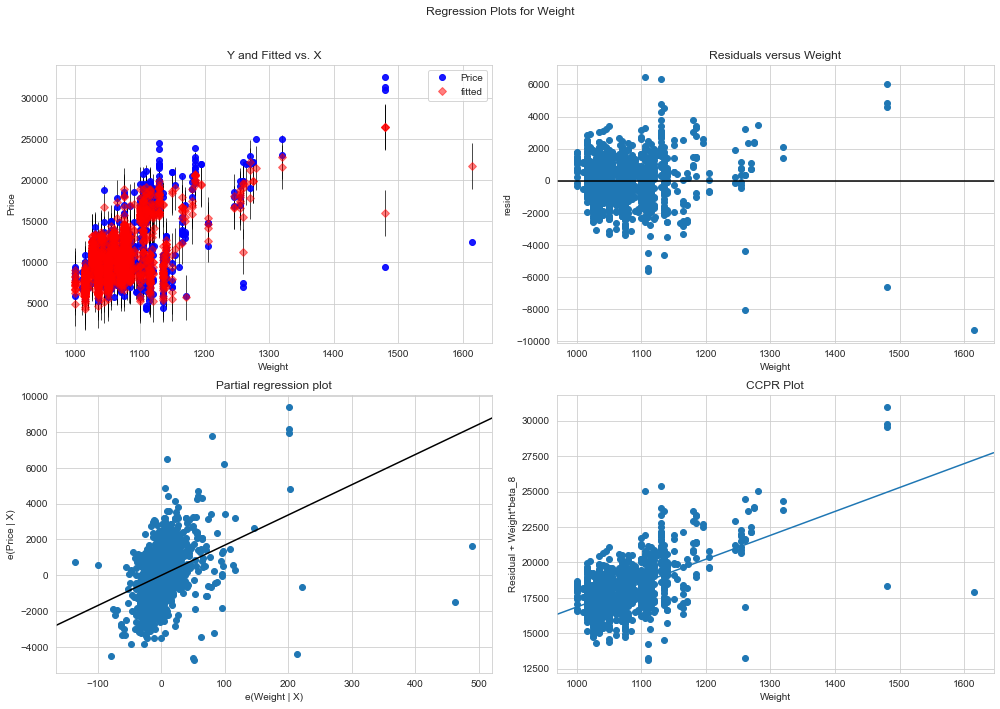

In [117]:
fig = plt.figure(figsize=(14,10))
fig = sm.graphics.plot_regress_exog(model, "Weight",fig=fig)
plt.show()

##  Model Deletion Diagnostics (checking outliers or influencers)

### Two Techniques:- 1. Cook's Distance

In [118]:
model_influence = model.get_influence()
(c, _)= model_influence.cooks_distance

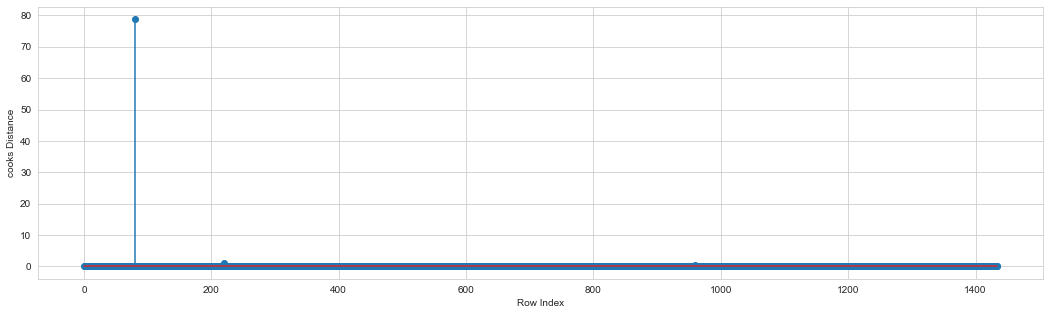

In [119]:
#plot the influencers value using stem plot 
fig = plt.figure(figsize=(18,5))
plt.stem(np.arange(len(toyota_cars_data)),np.round(c, 3))
plt.xlabel('Row Index')
plt.ylabel('cooks Distance')
plt.show()

In [120]:
# index and value of influencers where c is more than .5
(np.argmax(c),np.max(c))

(80, 78.7295058224851)

##  2. Leverage value

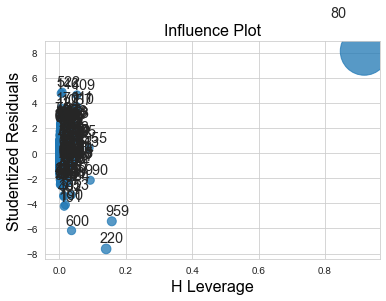

In [121]:
# 2. Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
influence_plot(model)
plt.show()

In [122]:
toyota_cars_data.shape

(1435, 9)

In [123]:
k =toyota_cars_data.shape[1]
n = toyota_cars_data.shape[0]
leverage_cutoff = 3*((k+1)/n)
leverage_cutoff

0.020905923344947737

In [124]:
toyota_cars_data[toyota_cars_data.index.isin([80])]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
80,18950,25,20019,110,16000,5,5,100,1180


## Improving the model

In [125]:
# Creating a copy of data so that original dataset is not affected
toyota_data = toyota_cars_data.copy()
toyota_data

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [127]:
toyota_data2=toyota_data.drop(toyota_data.index[[80]],axis=0).reset_index(drop=True)
toyota_data2

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [128]:
final_data =smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=toyota_data2).fit() 
final_data.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     1172.
Date:                Sat, 19 Feb 2022   Prob (F-statistic):               0.00
Time:                        14:29:47   Log-Likelihood:                -12326.
No. Observations:                1434   AIC:                         2.467e+04
Df Residuals:                    1425   BIC:                         2.472e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6197.9334   1383.989     -4.478      0.000   -8912.808   -3483.059
Age         -120.5074      2.561    -47.048      0.000    -125.532    -115.483
KM            -0.0178      0.001    -13.931      0.000      -0.020      -0.015
HP            39.2245      2.912     13.470      0.000      33.512      44.937
CC            -2.5088      0.307     -8.162      0.000      -3.112      -1.906
Doors        -26.5129     39.235     -0.676      0.499    -103.478      50.452
Gears        527.1292    192.832      2.734      0.006     148.864     905.395
QT             8.9414      1.427      6.268      0.000       6.143      11.740
Weight        20.0627      1.118     17.944      0.000      17.869      22.256
==============================================================================
Omnibus:                      242.181   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2635.168
Skew:                          -0.427   Prob(JB):                         0.00
Kurtosis:                       9.586   Cond. No.                     3.14e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.14e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Predicting for new Data

In [129]:
# say New data for prediction is
new_data=pd.DataFrame({'Age':12,"KM":40000,"HP":80,"CC":1300,"Doors":4,"Gears":5,"QT":69,"Weight":1012},index=[0])
new_data

,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,12,40000,80,1300,4,5,69,1012


In [130]:
# Manual Prediction of Price
final_data.predict(new_data)

0    14970.556739
dtype: float64

In [131]:
pred_y=final_data.predict(toyota_data2)
pred_y

0       16513.565909
1       16051.656226
2       16486.949796
3       16133.995128
4       15921.372341
            ...     
1429     8970.611964
1430     8435.944671
1431     8591.765915
1432     8714.053275
1433     9966.948423
Length: 1434, dtype: float64

## Table containing R^2 value for each prepared model


In [132]:
d2={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_data.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model,0.862520
1,Final_Model,0.868116
